## Linear Regression

In [3]:
# @hidden_cell
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X

array([[1.84909418],
       [0.2755664 ],
       [0.5466539 ],
       [1.48221139],
       [1.3396627 ],
       [1.34322627],
       [0.45078111],
       [0.22080113],
       [1.87437072],
       [0.86894295],
       [1.37148898],
       [0.57735728],
       [0.08573824],
       [1.12868581],
       [0.82738485],
       [0.50428431],
       [1.37090332],
       [1.51549629],
       [1.74376956],
       [0.2571058 ],
       [0.09399127],
       [1.38756948],
       [1.52561171],
       [1.73993283],
       [0.33579045],
       [0.61238426],
       [0.72569432],
       [1.49724722],
       [0.56560397],
       [1.70180535],
       [0.31284649],
       [0.550369  ],
       [1.33105078],
       [0.84183248],
       [0.0346473 ],
       [1.85492985],
       [0.8557862 ],
       [0.52637067],
       [1.5880738 ],
       [1.92268381],
       [1.68316877],
       [0.6084491 ],
       [1.31172462],
       [0.14546162],
       [0.69170263],
       [0.5418882 ],
       [1.7476705 ],
       [0.764

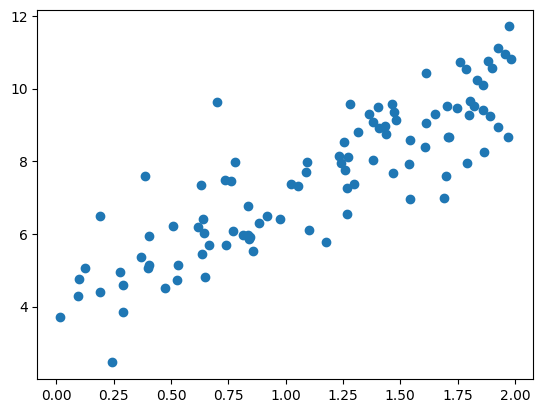

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.08708786],
       [3.03627179]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.08708786],
       [10.15963144]])

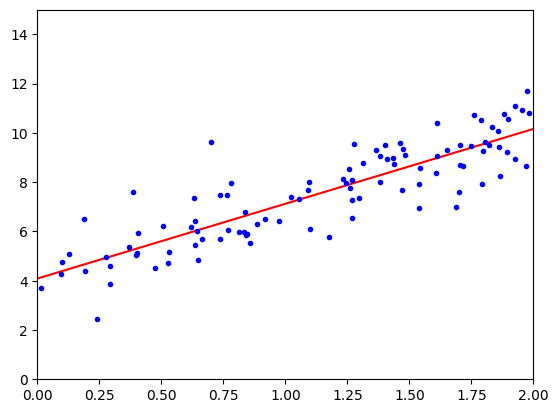

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08708786]), array([[3.03627179]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.08708786],
       [10.15963144]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08708786],
       [3.03627179]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.08708786],
       [3.03627179]])

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
m = len(X_b)

def learning_schedule(t):
    return t0 / (t + t1)
    
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.10643159],
       [3.03930448]])